# South African Language Identification Hack 2023

#### Overview


        South Africa is a multicultural society with rich linguistic diversity. 
        Its 11 official languages hold equal status and play crucial roles in enhancing democracy
        and enriching various aspects of social, cultural, economic, and political life. 
        The majority of South Africans are multilingual, proficient in speaking two or more official languages.

 #### Importing Libraries

In [189]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

from langdetect import detect
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#### Loading Data

In [190]:
train_df = pd.read_csv(r"C:\Users\nengo\Downloads\south-african-language-identification-hack-2023\train_set.csv")
test_df = pd.read_csv(r"C:\Users\nengo\Downloads\south-african-language-identification-hack-2023\test_set.csv")

## Exploratory Data Analysis (EDA)

In [191]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [192]:
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

Train Dataset:
  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

Test Dataset:
   index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.


#### Data Preprocessing

In [193]:

def preprocess_data(train_df, test_df):
    # Initializing the Count Vectorizer
    vectorizer = CountVectorizer()

    # Fitting the vectorizer on the training data
    vectorizer.fit(train_df['text'])

    # Transforming the training and test data using the fitted vectorizer
    train_features = vectorizer.transform(train_df['text'])
    test_features = vectorizer.transform(test_df['text'])

    return train_features, test_features, vectorizer


In [194]:
train_features, test_features, vectorizer = preprocess_data(train_df, test_df)

In [195]:
def identify_language(text):
    try:
        language = detect(text)
        return language
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example text in various languages
texts = [
    "Hello, how are you?",                    # English
    "¡Hola! ¿Cómo estás?",                    # Spanish
    "Bonjour, comment ça va?",                # French
    "Hallo, wie geht es dir?",                # German
    "Hoe gaan dit met jou?",                  # Afrikaans
    "Avuxeni, u njhani?",                     # Xitsonga
    "Yebo, kunjani?",                         # Zulu
    "Dumela, o kae?",                         # Setswana
    "Lefatshe la rona le kgalwa ke wena.",    # Sesotho
    "Molweni, unjani?",                       # isiXhosa
    "Salibonani, unjani?"                     # isiZulu
]

# Identifying languages for each text
for idx, text in enumerate(texts):
    language = identify_language(text)
    print(f"Text {idx + 1} is in {language} language.")


Text 1 is in en language.
Text 2 is in es language.
Text 3 is in fr language.
Text 4 is in de language.
Text 5 is in af language.
Text 6 is in hr language.
Text 7 is in sw language.
Text 8 is in hr language.
Text 9 is in sw language.
Text 10 is in sw language.
Text 11 is in sw language.


##  Developing, Training,  Evaluation and Validation using Different Classification Models

#### Splitting the data

In [196]:
## splitting the data
X_train, X_val, y_train, y_val = train_test_split(train_features, train_df['lang_id'], test_size=0.2, random_state=42)

## Logistics Regression Classification Model

#### Using Cross Validation in order to validate the model

In [200]:
# Initialize Logistic Regression model
linearR_model = LogisticRegression()

# Train the model using the training data
linearR_model.fit(X_train, y_train)

# Perform 5-fold cross-validation and calculate F1 score
f1_scores = cross_val_score(linearR_model, X_train, y_train, cv=5, scoring='f1_weighted')

# Calculate mean F1 score from cross-validation
mean_f1_score_cv = f1_scores.mean()
print("Mean F1 Score (Cross-validation):", mean_f1_score_cv)

# Predict on the validation set (X_val)
linearR_preds_val = linearR_model.predict(X_val)

# Calculate F1 score on the validation set
linearR_f1_val = f1_score(y_val, linearR_preds_val, average='weighted')
print("F1 Score on Validation Set:", linearR_f1_val)

# Finally, predict and calculate F1 score on the test set (X_test)
linearR_preds_test = linearR_model.predict(X_val)
linearR_f1_test = f1_score(y_val, linearR_preds_test, average='weighted')
print("F1 Score on Test Set:", linearR_f1_test)


C:\Users\nengo\Documents\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nengo\Documents\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Mean F1 Score (Cross-validation): 0.9953773485889361
F1 Score on Validation Set: 0.9937882049967754
F1 Score on Test Set: 0.9937882049967754


In [201]:
#Using LR_model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = linearR_model.predict(X_test) # LR model

In [202]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub_LR.csv', index=False) # LR_model 0.7

## K Nearest Neighbors (KNN) Classification Model

In [197]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Define the scorer using F1 score
scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation and calculate F1 score
knn_f1_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring=scorer)

# Calculate mean F1 score from cross-validation
mean_f1_score_cv = knn_f1_scores.mean()
print("Mean F1 Score (Cross-validation):", mean_f1_score_cv)

# Make predictions using cross-validation (on training data)
knn_cv_predictions = cross_val_predict(knn_model, X_train, y_train, cv=5)

# Fit the model on the entire training data
knn_model.fit(X_train, y_train)

# Predict on the validation set (X_val)
knn_val_predictions = knn_model.predict(X_val)

# Calculate F1 score on the validation set
knn_f1_val = f1_score(y_val, knn_val_predictions, average='weighted')
print("F1 Score on Validation Set:", knn_f1_val)

# Finally, predict and calculate F1 score on the test set (X_test)
knn_test_predictions = knn_model.predict(X_val)
knn_f1_test = f1_score(y_val, knn_test_predictions, average='weighted')
print("F1 Score on Test Set:", knn_f1_test)


Mean F1 Score (Cross-validation): 0.9170334709207628
F1 Score on Validation Set: 0.9175947192684192
F1 Score on Test Set: 0.9175947192684192


In [198]:
#Using Knn_model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = knn_model.predict(X_test) # knn_model

In [199]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub3.csv', index=False) # knn_model

## Support Vector Machine Classification Model


In [203]:
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize SVM classifier
svm = SVC()

# Train the SVM model using the training data
svm.fit(X_train, y_train)

# Make predictions on the validation set (X_val)
svm_predictions = svm.predict(X_val)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, svm_predictions, average='weighted')
recall = recall_score(y_val, svm_predictions, average='weighted')
svm_f1 = f1_score(y_val, svm_predictions, average='weighted')

print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 Score:", svm_f1)


SVM Precision: 0.9915448909368751
SVM Recall: 0.9915151515151515
SVM F1 Score: 0.9915204291200247


Accuracy: 0.9915151515151515


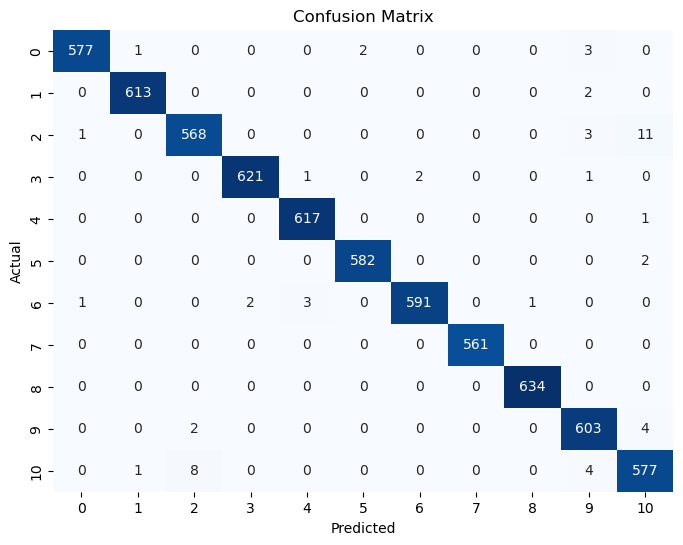

In [204]:
# Initialize SVM classifier 
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  

svm_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_val, svm_predictions)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_val, svm_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [205]:
#Using svm_model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = svm.predict(X_test) # svm model

In [206]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub2_svm_model.csv', index=False) #svm model

##  Building the Multinomial Naive Bayes Model


In [210]:
# Initialize Multinomial Naive Bayes model
nb = MultinomialNB()

#Train Moddel
nb.fit(X_train, y_train)

# Make predictions on the validation set
nb_predictions = nb.predict(X_val)

# Calculate F1 score on the validation set
nb_f1 = f1_score(y_val, nb_predictions, average='weighted')
print("Naive Bayes F1 Score:", nb_f1)
# Perform 5-fold cross-validation and calculate F1 score
f1_scores_cv = cross_val_score(nb, X_train, y_train, cv=5, scoring='f1_weighted')

# Calculate mean F1 score from cross-validation
mean_f1_score_cv = f1_scores_cv.mean()
print("Mean F1 Score (Cross-validation):", mean_f1_score_cv)

Naive Bayes F1 Score: 0.9989392771541917
Mean F1 Score (Cross-validation): 0.9992427428179687


#### Generate predictions on the test set

In [211]:
#Using nb Model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = nb.predict(X_test)

#### Creating a csv for submission


In [212]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub1_nb_model.csv', index=False) #nb model

## Decision Tree Classification Model

In [213]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
decision_tree.fit(X_train, y_train)

# Predict on the test set
predictions = decision_tree.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_val, predictions))

Accuracy: 0.9484848484848485
Classification Report:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.99      1.00      0.99       615
         nbl       0.90      0.88      0.89       583
         nso       1.00      0.96      0.98       625
         sot       0.97      0.99      0.98       618
         ssw       0.87      0.90      0.88       584
         tsn       0.96      0.98      0.97       598
         tso       0.98      0.99      0.99       561
         ven       1.00      0.99      0.99       634
         xho       0.93      0.88      0.91       609
         zul       0.84      0.87      0.86       590

    accuracy                           0.95      6600
   macro avg       0.95      0.95      0.95      6600
weighted avg       0.95      0.95      0.95      6600



In [214]:
#Using nb Model
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = decision_tree.predict(X_test)

In [216]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('Decision_Tree.csv', index=False) #Decision Tree

## AdaBoost Classification Model

In [217]:
# Assuming train_df contains 'text' column and 'lang_id' as the target variable
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['lang_id'], test_size=0.2, random_state=42)

# Initialize and fit the CountVectorizer on the training text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Initialize the AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Train the AdaBoost Classifier
adaboost_clf.fit(X_train_vectorized, y_train)

# Transform the test data using the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)

# Predict on the test set
test_predictions = adaboost_clf.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Accuracy: 0.5677272727272727
Classification Report:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       583
         eng       0.98      1.00      0.99       615
         nbl       0.46      0.06      0.11       583
         nso       0.41      0.96      0.57       625
         sot       0.99      0.62      0.76       618
         ssw       0.26      0.93      0.40       584
         tsn       0.37      0.04      0.07       598
         tso       0.83      0.53      0.65       561
         ven       0.79      0.98      0.88       634
         xho       0.43      0.08      0.14       609
         zul       0.00      0.00      0.00       590

    accuracy                           0.57      6600
   macro avg       0.59      0.56      0.51      6600
weighted avg       0.59      0.57      0.51      6600



In [218]:
#Using AdaBoost classifier Model 
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = adaboost_clf.predict(X_test) 

In [219]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('FinalSub6_AdaBoost.csv', index=False) #AdaBoost